## SALES FORECASTING USING ARIMA

### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Load and Clean Data

In [6]:
df = pd.read_csv("perrin-freres-monthly-champagne-.csv", skipfooter = 2, engine = "python")

In [7]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [8]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [9]:
df.columns = ['Month', 'Sales']
df.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [10]:
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [11]:
df.set_index('Month', inplace = True)

In [12]:
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [13]:
df.isna().sum()

Sales    0
dtype: int64

### Visualize Data

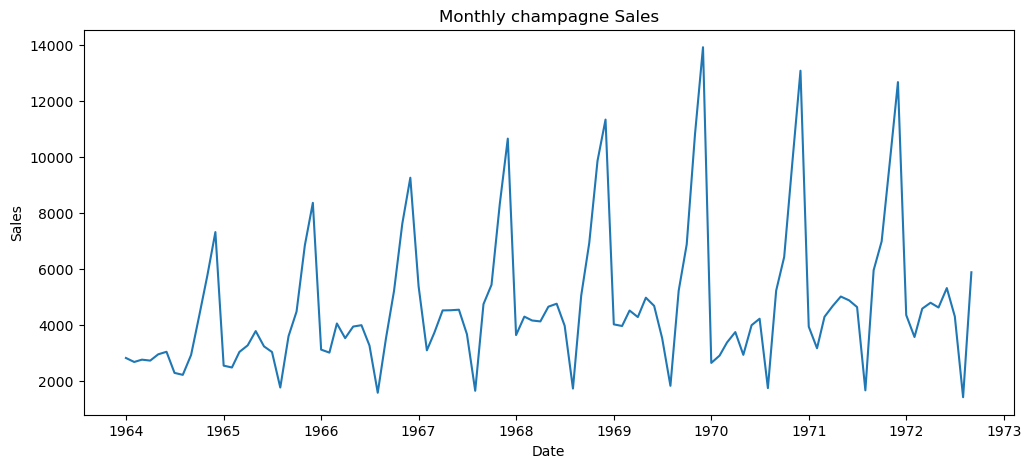

In [15]:
plt.figure(figsize = (12,5))
plt.plot(df['Sales'])
plt.title('Monthly champagne Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

### Seasonal Decomposition

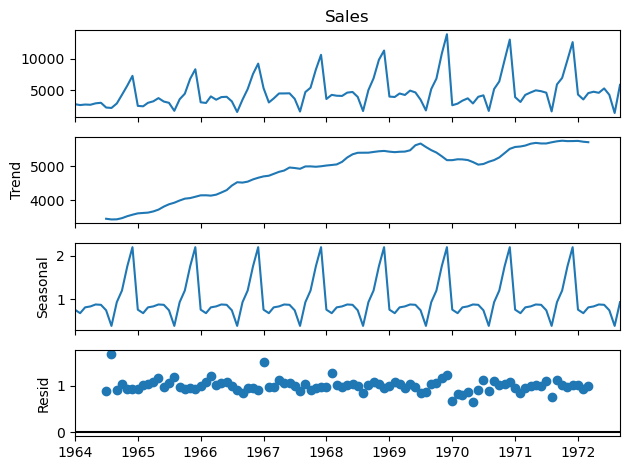

In [17]:
decomposition = seasonal_decompose(df['Sales'], model = 'multiplicative', period = 12)
decomposition.plot()
plt.show()

### Check Stationarity (ADF Test)

In [19]:
result = adfuller(df['Sales'])

print(f'ADF Statistic : {result[0]}')
print(f'pvalue : {result[1]}')

if result[1] < 0.05:
    print('Data is Stationary')
else:
    print('Data is not stationary')

ADF Statistic : -1.833593056327635
pvalue : 0.36391577166023914
Data is not stationary


### ACF & PACF (Autocorrelation Check)

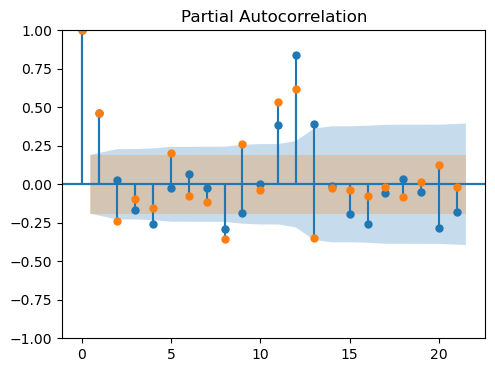

In [21]:
plt.figure(figsize = (12,4))

plt.subplot(121)
plot_acf(df['Sales'], ax = plt.gca())

plt.subplot(121)
plot_pacf(df['Sales'], ax = plt.gca())

plt.show()

### Train - Test - Split ( Last 12 months for Testing)

In [23]:
train = df.iloc[:-12]
test = df.iloc[-12:]

print('Train size :', len(train))
print('Test size :', len(test))

Train size : 93
Test size : 12


### Auto_arima to find Best Parameters

In [25]:
stepwise_fit = auto_arima(train['Sales'],
                         seasonal = True,
                         m = 12,
                         trace = True,
                         suppress_warnings = True)

print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1320.438, Time=1.95 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1315.739, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1313.732, Time=0.50 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1314.620, Time=0.70 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1325.791, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1315.489, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1314.184, Time=0.60 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1314.675, Time=1.31 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1314.718, Time=0.17 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1315.563, Time=1.28 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1315.716, Time=0.29 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1315.762, Time=0.51 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1315.796, Time=0.54 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1313.652, Time=0.65 sec
 ARIMA(0,0,1)(0,1,0

### Fit SARIMA Model

In [27]:
model = SARIMAX(train['Sales'], order = stepwise_fit.order, seasonal_order = stepwise_fit.seasonal_order)
model_fit = model.fit()

print(model_fit.summary())

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   93
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                -658.802
Date:                             Sat, 31 Jan 2026   AIC                           1323.604
Time:                                     23:59:18   BIC                           1330.787
Sample:                                 01-01-1964   HQIC                          1326.486
                                      - 09-01-1971                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2631      0.091      2.887      0.004       0.084       0.442
ar.S.L12      -0.0654      

### Forecast Test Data

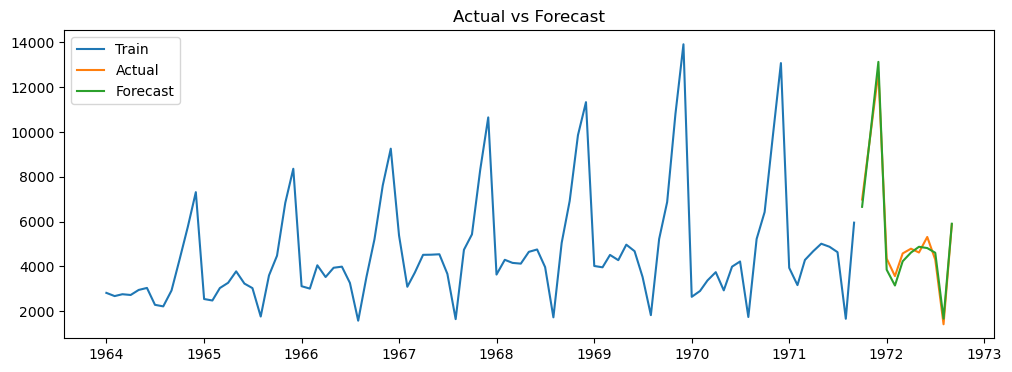

In [29]:
forecast = model_fit.forecast(steps = 12)

plt.figure(figsize = (12,4))
plt.plot(train.index, train['Sales'], label = 'Train')
plt.plot(test.index, test['Sales'], label = 'Actual')
plt.plot(test.index,forecast, label = 'Forecast')
plt.legend()
plt.title('Actual vs Forecast')
plt.show()

### Evaluate Model

In [31]:
mse = mean_squared_error(test['Sales'],forecast)
mae = mean_absolute_error(test['Sales'], forecast)
rmse = np.sqrt(mean_squared_error(test['Sales'],forecast))
mape = np.mean(np.abs((test['Sales'] - forecast) / test['Sales'])) * 100

print("MSE :", mse)
print("MAE : ", mae)
print("RMSE : ", rmse)
print("MAPE : ", mape)

MSE : 113951.2435054755
MAE :  301.42314840519936
RMSE :  337.5666504639869
MAPE :  6.96595064742676


### Residual Diagnostics

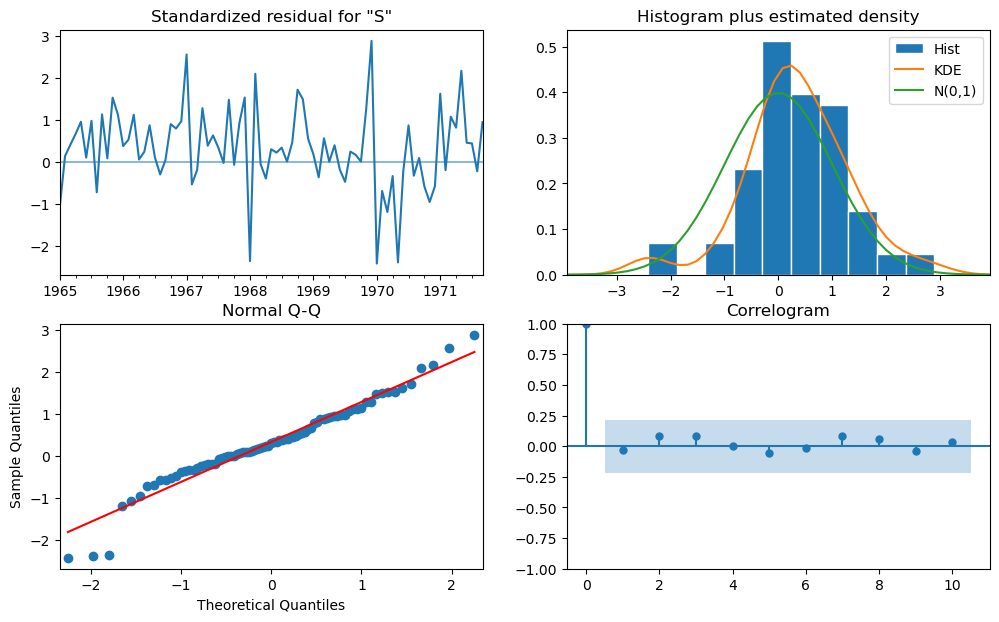

In [33]:
model_fit.plot_diagnostics(figsize = (12,7))
plt.show()

### Final Future Forecast (Next 12 Months)

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


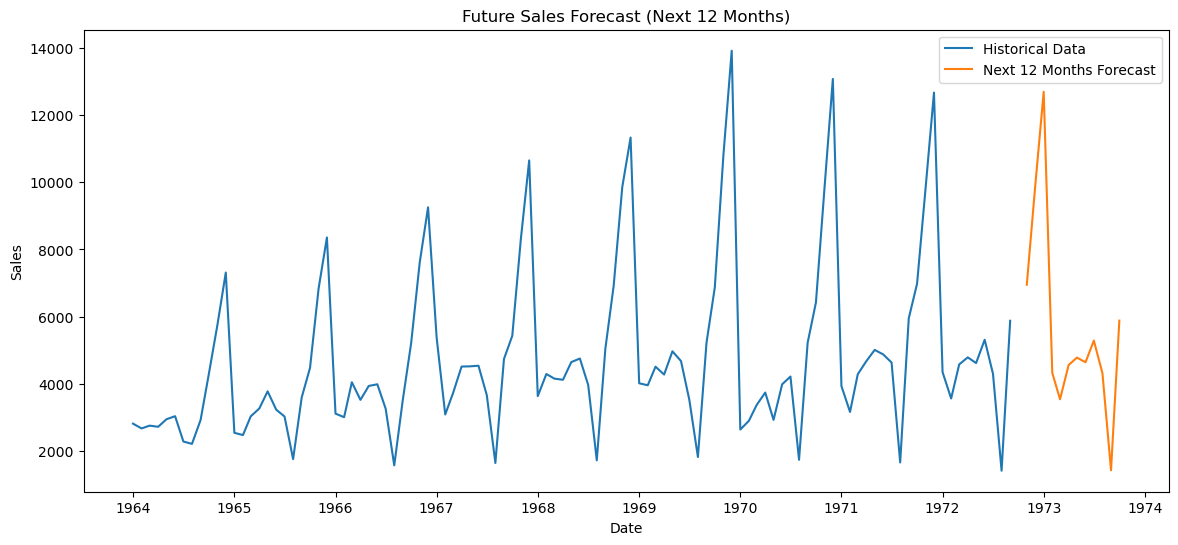

In [35]:
final_model = SARIMAX(df['Sales'], order = stepwise_fit.order, seasonal_order = stepwise_fit.seasonal_order)
final_model_fit = final_model.fit()
future_forecast = final_model_fit.forecast(steps = 12)

plt.figure(figsize = (14,6))
plt.plot(df.index,df['Sales'], label = 'Historical Data')
plt.plot(pd.date_range(df.index[-1], periods = 13, freq = 'M')[1:], future_forecast, label = 'Next 12 Months Forecast')
plt.legend()
plt.title('Future Sales Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()